In [1]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
DATA_PATH = "/content/drive/MyDrive/03_income_predict/data/"

In [8]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트 데이터

train.shape, test.shape

((20000, 23), (10000, 22))

# 간단한 EDA 진행  

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [16]:
# 연속형 변수 추출
train_int = train[train.describe().columns].copy()
# 이산형 변수 추출, 연속형 변수가 아닌 부분을 train.columns.difference를 통해서 출력해주는 것이다.
train_str = train[train.columns.difference(train.describe().columns)].copy()

In [ ]:
train_int.head()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
0,63,4,0,0,0,425
1,37,52,0,0,0,0
2,58,52,3411,0,0,860
3,44,52,0,0,0,850
4,37,52,0,0,0,570


In [ ]:
train_int.columns

Index(['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends',
       'Income'],
      dtype='object')

In [ ]:
train_str.head()

,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Citizenship,Education_Status,Employment_Status,Gender,Hispanic_Origin,Household_Status,Household_Summary,ID,Income_Status,Industry_Status,Martial_Status,Occupation_Status,Race,Tax_Status
0,US,US,US,Native,Middle (7-8),Full-Time,M,All other,Householder,Householder,TRAIN_00000,Unknown,Social Services,Married,Services,White,Nonfiler
1,US,US,US,Native,Associates degree (Vocational),Full-Time,M,All other,Nonfamily householder,Householder,TRAIN_00001,Under Median,Entertainment,Separated,Services,White,Single
2,US,US,US,Native,High graduate,Full-Time,F,All other,Householder,Householder,TRAIN_00002,Under Median,Manufacturing (Non-durable),Married,Admin Support (include Clerical),Black,Married Filling Jointly both under 65 (MFJ)
3,US,US,US,Native,High graduate,Full-Time,M,All other,Nonfamily householder,Householder,TRAIN_00003,Under Median,Retail,Divorced,Technicians & Support,White,Single
4,US,US,US,Native,High graduate,Full-Time,F,All other,Householder,Householder,TRAIN_00004,Unknown,Retail,Divorced,Sales,White,Head of Household (HOH)


In [ ]:
train_str.columns

Index(['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary', 'ID',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status'],
      dtype='object')

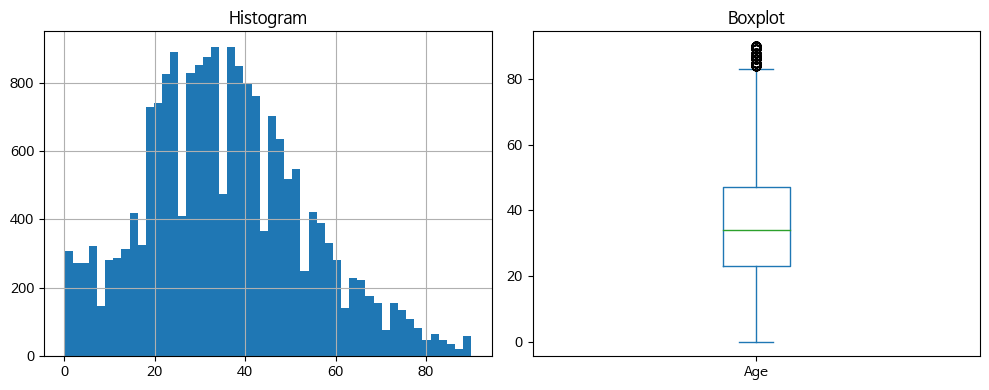

In [ ]:
# age

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Age'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Age'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

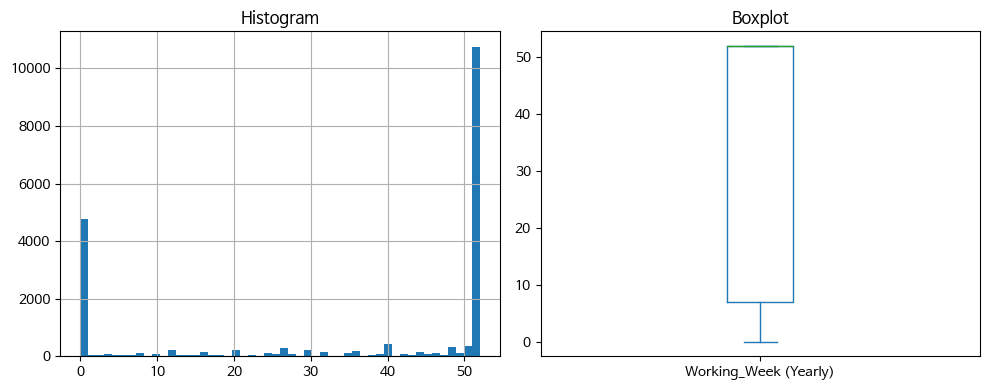

In [ ]:
# Working Week

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

- 이상치의 값은 거의 없어 보인다.
- 베르누이 분포와 비슷한 형태의 분포도를 보여주고 있는 것이다.

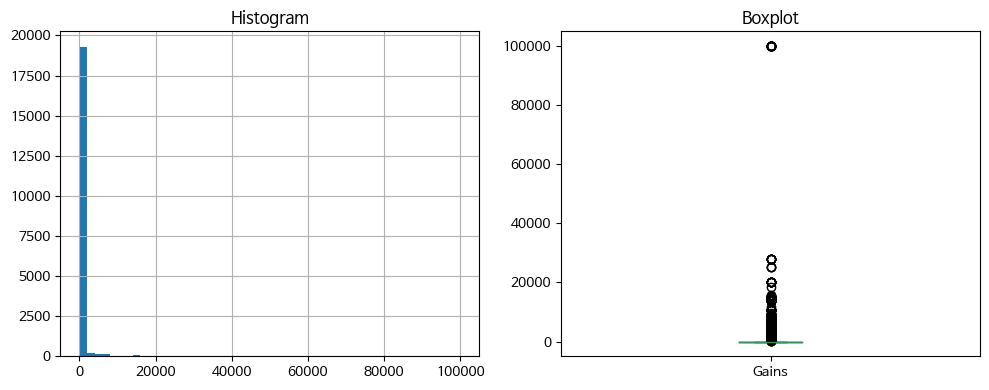

In [ ]:
# Gains (정확하지는 않는데 이득 또는 매출액을 의미하는 것 같음.)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

- 이상치의 값이 존재하는 것으로 해석할 수 있다 => 이는 추후에 제거하는 것이 좋을 듯
- 수입의 경우에는 역시나 초반에 몰려 있는 것을 확인할 수 있습니다. 이와 관련된 경제 지표가 있을 것 같은데 한번 확인 필요할 것 같습니다.

In [ ]:
train_int['Gains'].describe()
# 분위수를 따졌을 경우에는 25%, 50%, 75% 모두 0의 값으로 되어 있음. 이는 범주형 데이터로 항목화해도 될 것 같음.

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

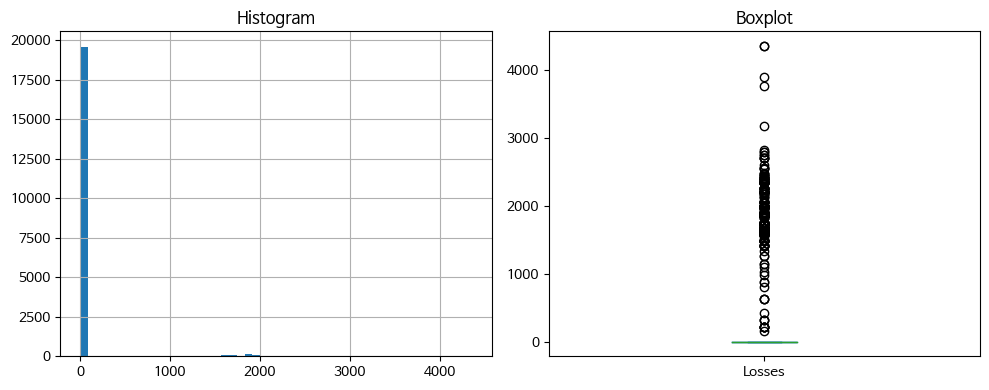

In [ ]:
# Losses = > 지출액

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

- 지출에 대한 자료로 보입니다.
- 대부분의 지줄의 경우에는 초반 수치에 몰려있는 것을 확인할 수 있습니다.
- 이는 범주형 데이터로의 항목화도 충분히 가능할 것이라고 해석할 수 있음.

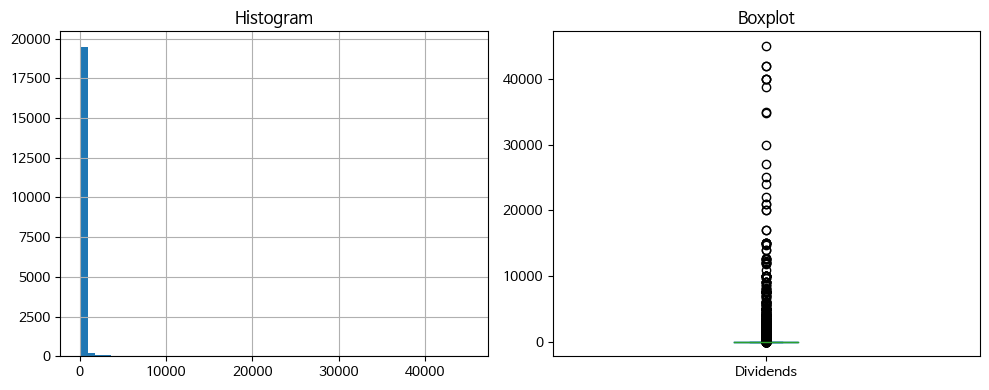

In [ ]:
# Dividends => 배당금

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

- gains는 투자 수익액
- lossses는 투자로 인한 손실
- Dividends는 배당금

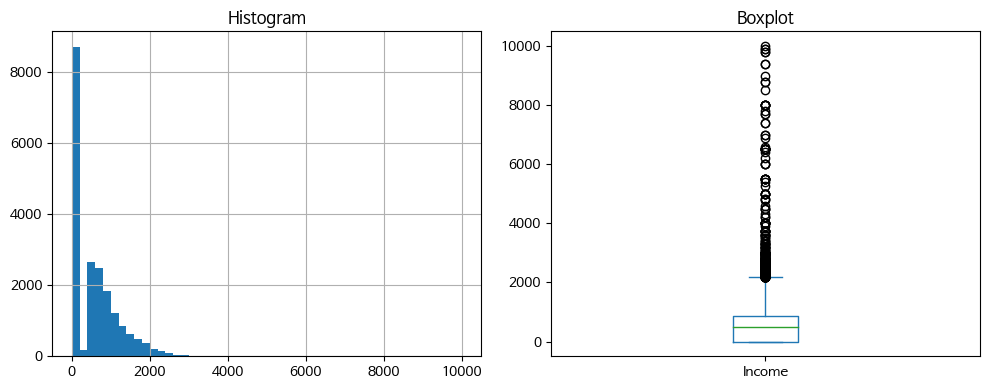

In [ ]:
# Income은 수익을 의미하는 것이다.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

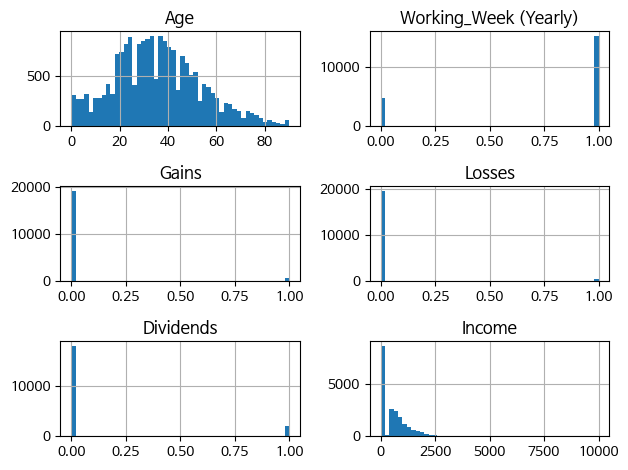

In [ ]:
zeroone= [train_int.iloc[:,i].apply(lambda x: 0 if x == 0 else 1) for i in range(1,5)]
train_zeroone= pd.DataFrame(zeroone).T
train_int_zeroone= pd.concat([train_int.iloc[:,[0]],train_zeroone,train_int.iloc[:,[-1]]],axis=1)
train_int_zeroone.hist(bins=50);
plt.tight_layout()

plt.show()

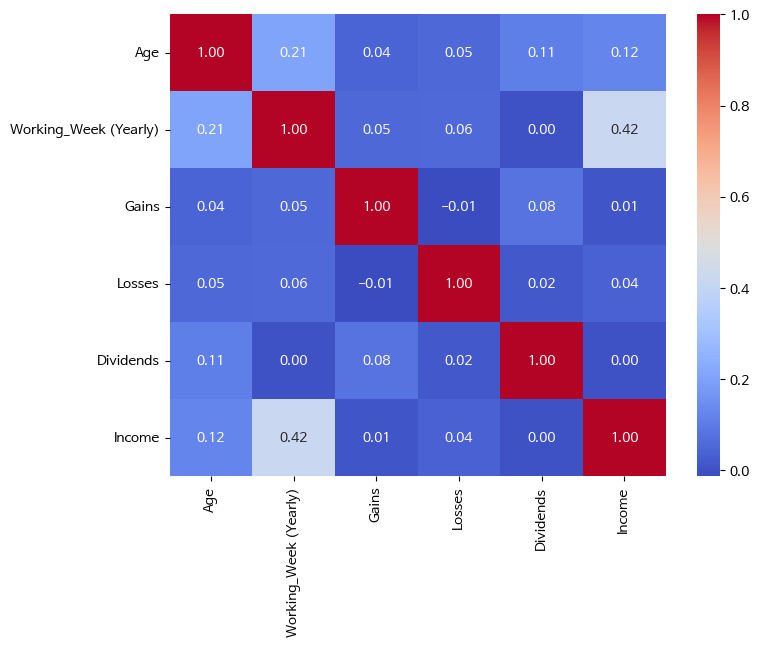

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap((train_int+1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- 주중 평균 근로 시간과 나이 사이에는 높은 양의 상관성을 보여준다.
- 주중 평균 근로 시간과 수익 사이에는 높은 양의 상관성을 보여준다.
- 나이와 소득 사이에는 어느 정도의 상관성이 존재합니다.

In [ ]:
train_str.columns

Index(['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary', 'ID',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status'],
      dtype='object')

In [ ]:
comparison_result = (train['Birth_Country'] == train['Birth_Country (Father)']).astype(int)
comparison_result.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

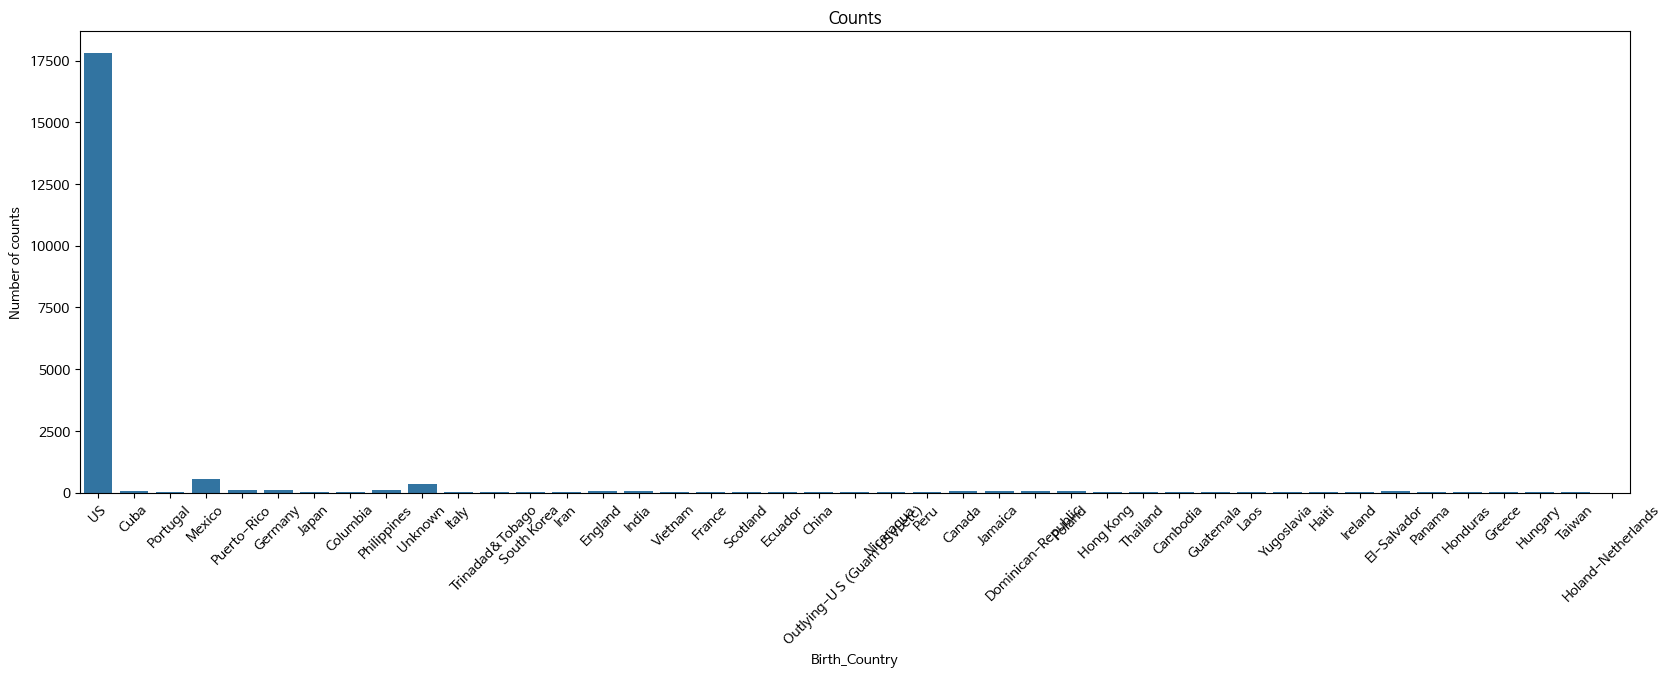

In [ ]:
# Birth_Country에 대한 수치를 countplot의 형식으로 만들어주었음

fig, axes = plt.subplots(figsize=(20, 6))

sns.countplot(data=train, x='Birth_Country')
plt.xticks(rotation=45)

plt.xlabel('Birth_Country')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

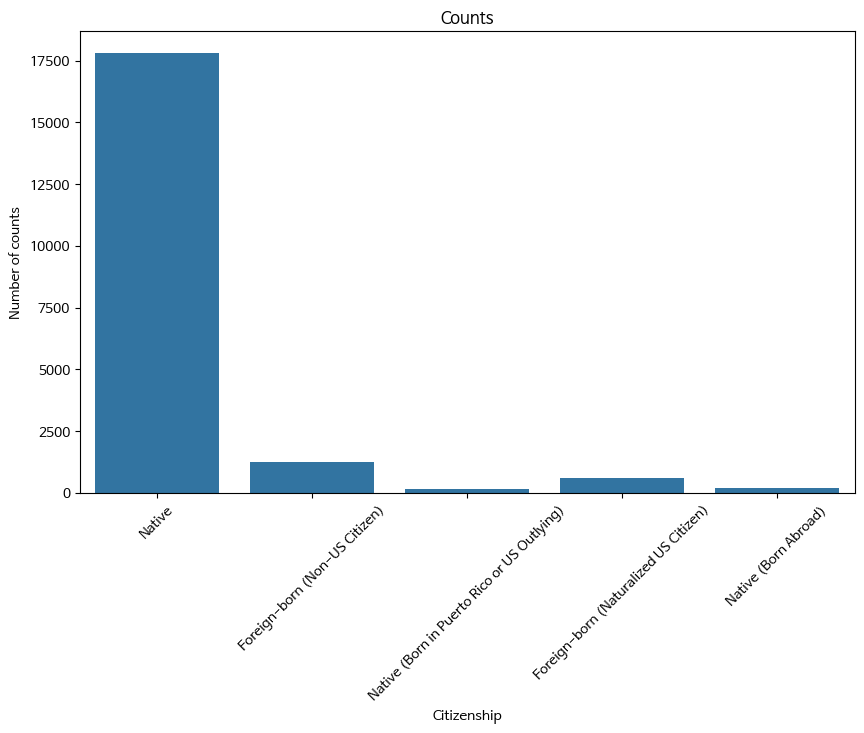

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6))

sns.countplot(data=train, x='Citizenship')
plt.xticks(rotation=45)

plt.xlabel('Citizenship')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

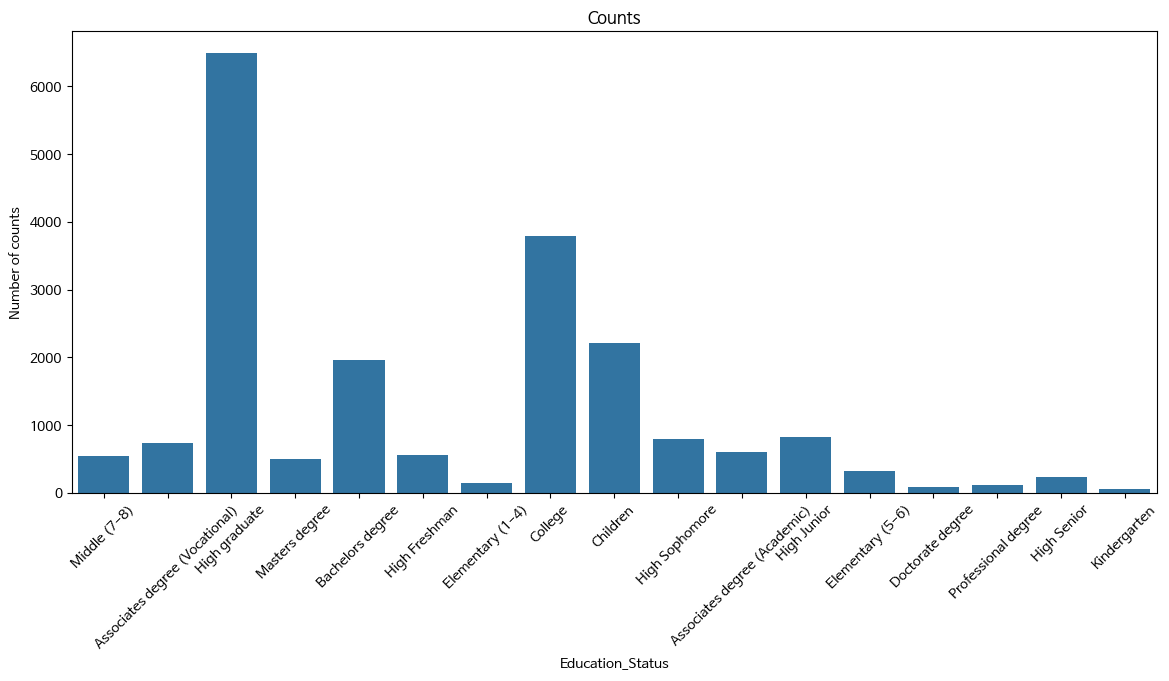

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

sns.countplot(data=train, x='Education_Status')
plt.xticks(rotation=45)

plt.xlabel('Education_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

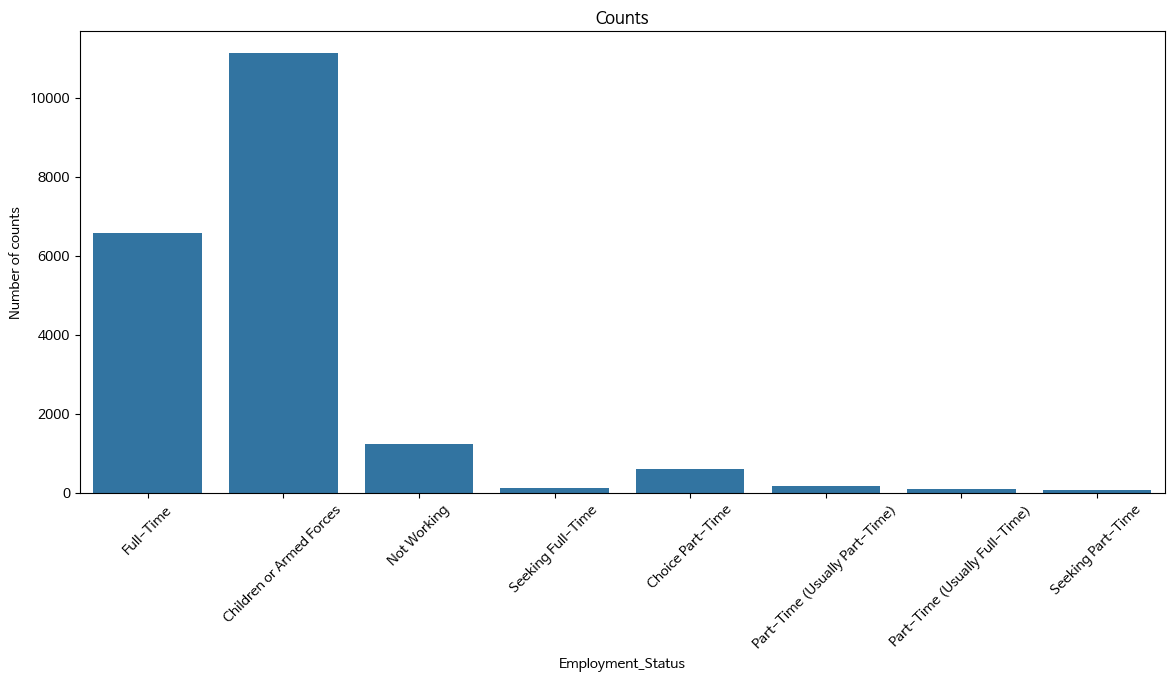

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

sns.countplot(data=train, x='Employment_Status')
plt.xticks(rotation=45)

plt.xlabel('Employment_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

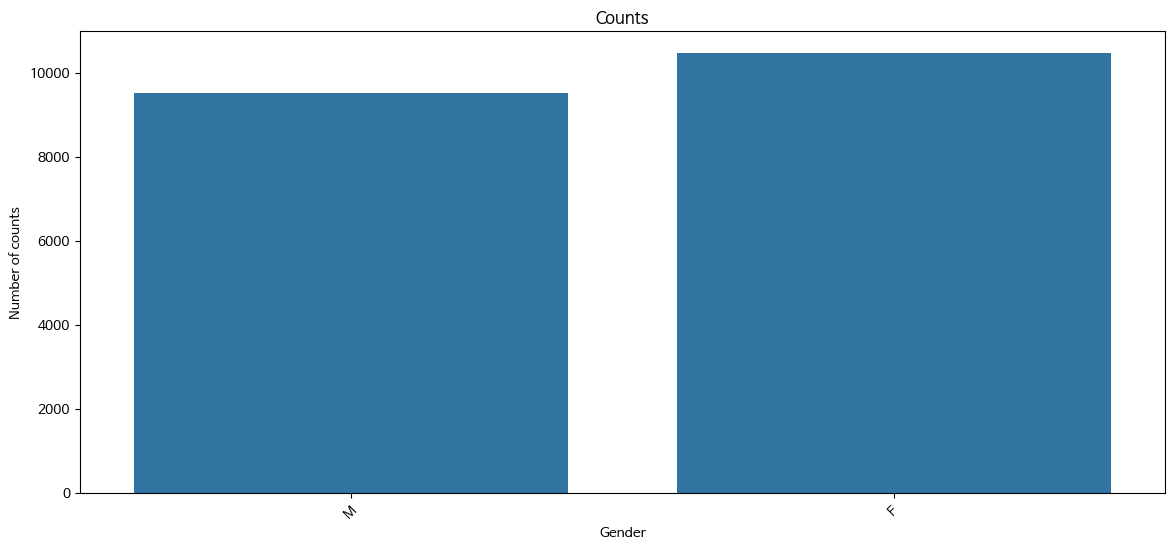

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

sns.countplot(data=train, x='Gender')
plt.xticks(rotation=45)

plt.xlabel('Gender')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

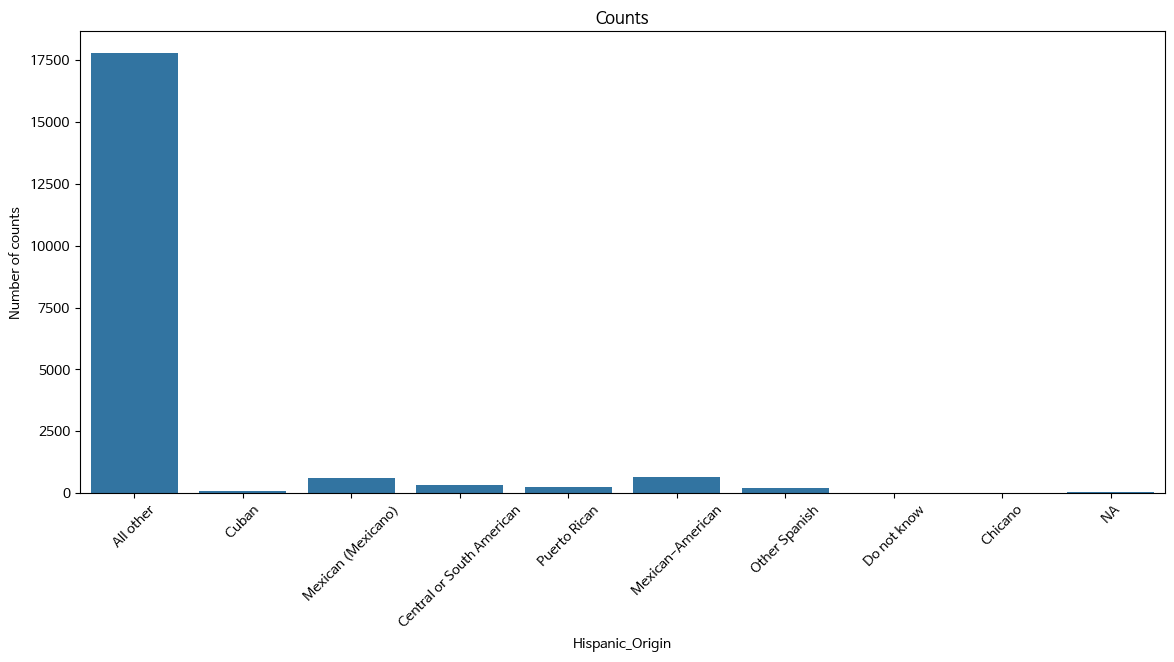

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

sns.countplot(data=train, x='Hispanic_Origin')
plt.xticks(rotation=45)

plt.xlabel('Hispanic_Origin')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

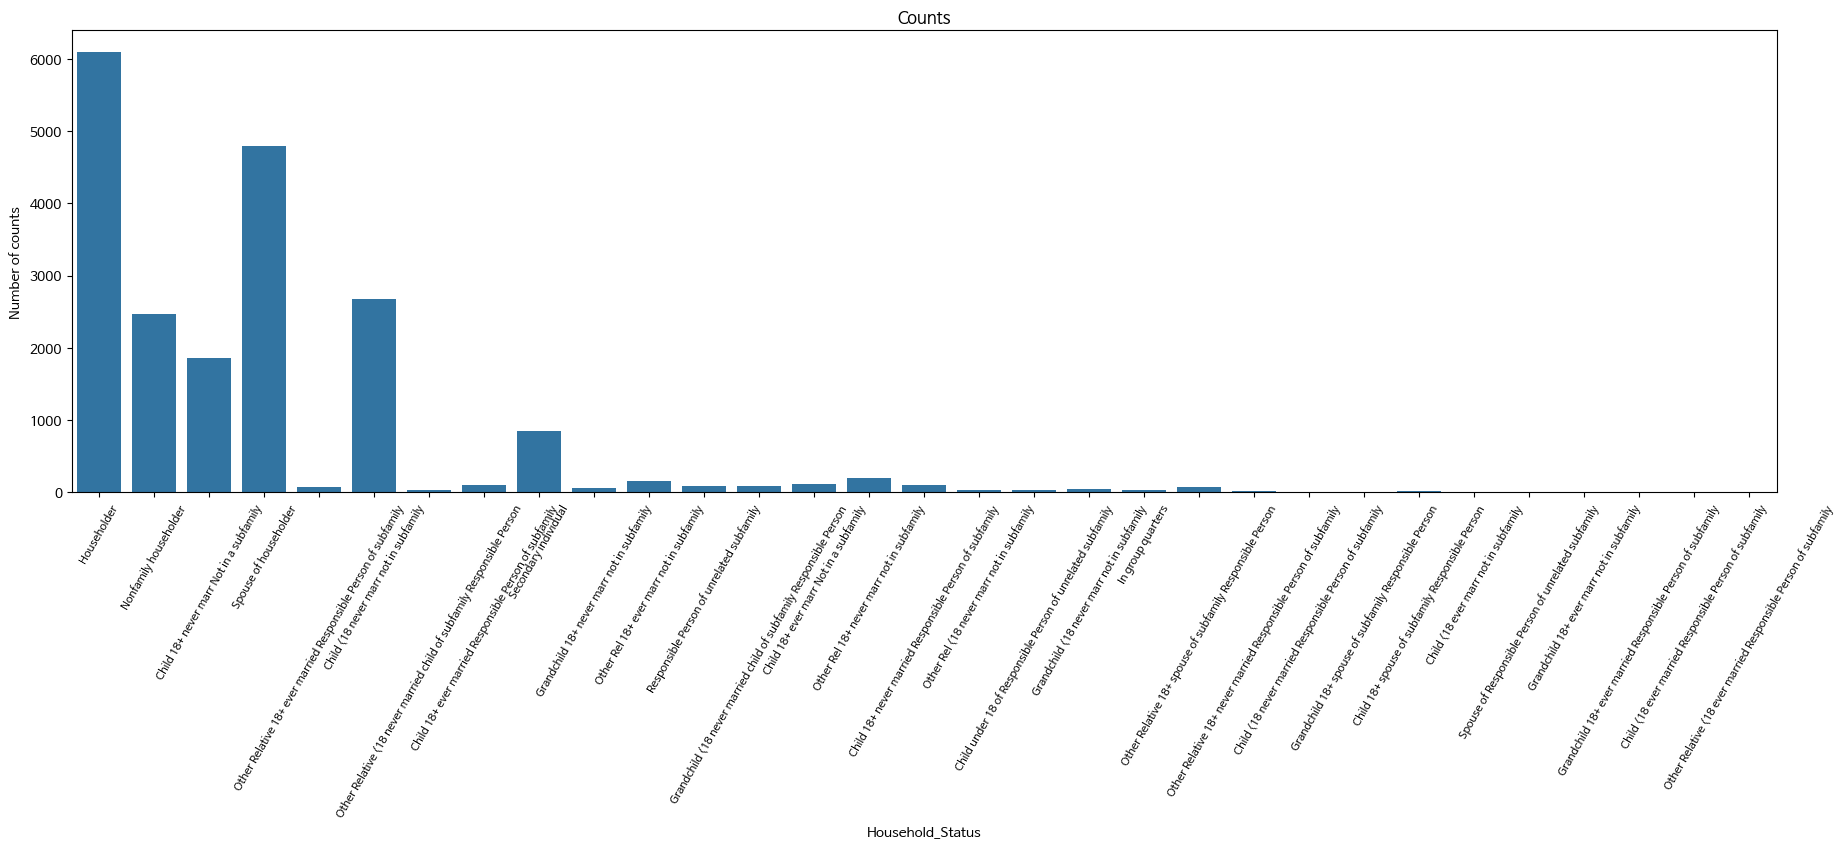

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Household_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Household_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

In [ ]:
# Hispanic_Origin에 대한 전처리

train['Hispanic_Origin'] = train['Hispanic_Origin'].str.strip()

In [ ]:
train_str.columns

Index(['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary', 'ID',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status'],
      dtype='object')

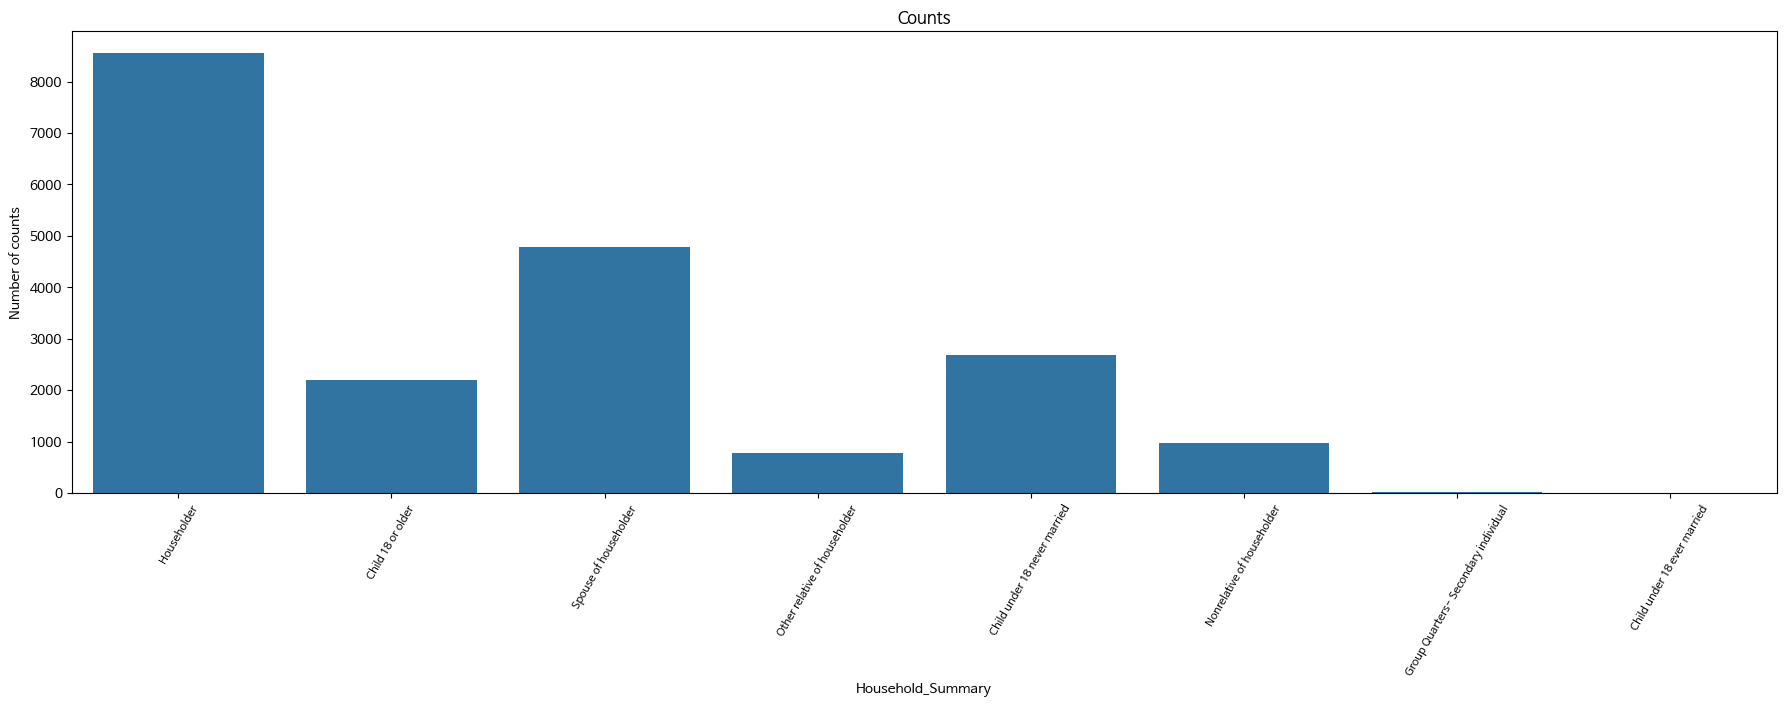

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Household_Summary')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Household_Summary')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

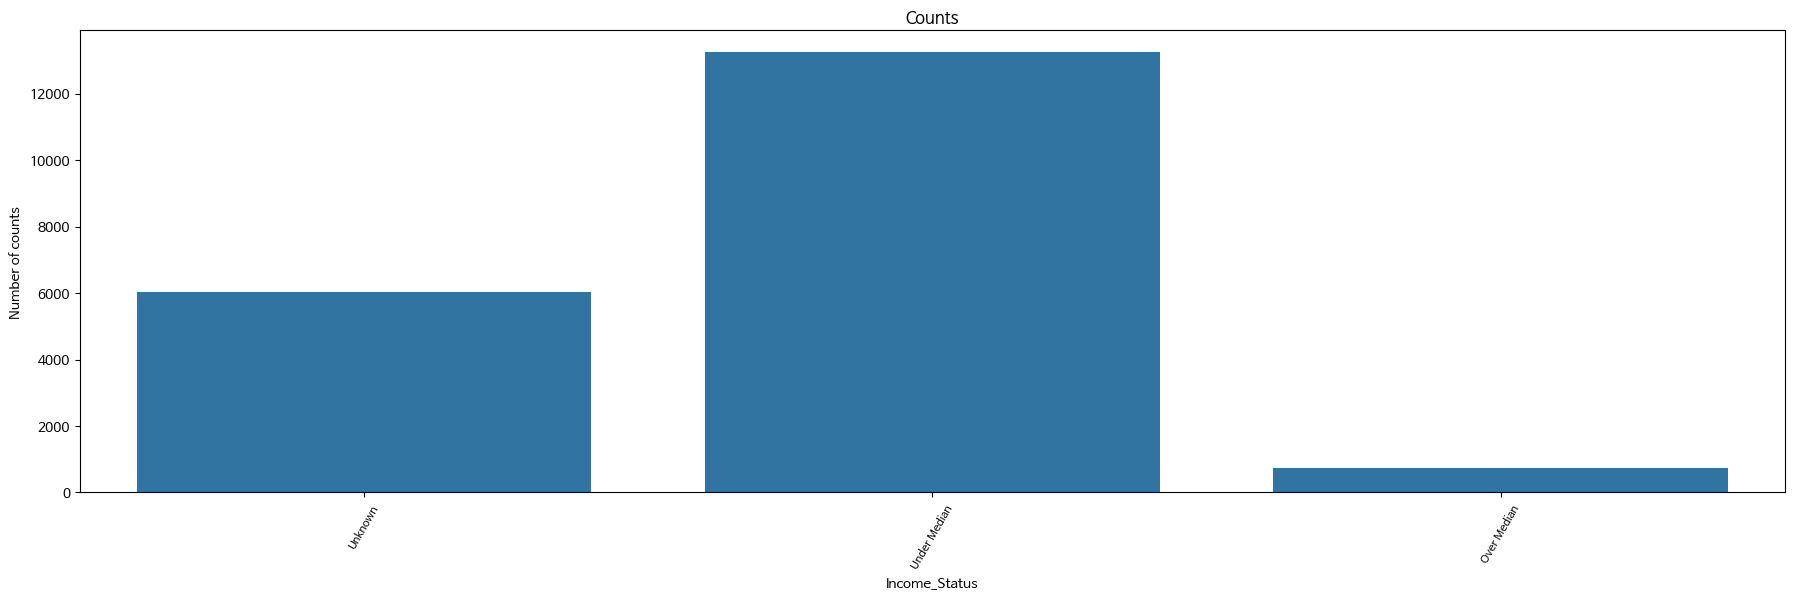

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Income_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Income_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

In [ ]:
# income_status에서 unknown이 차지하는 비율이 생각보다 높음
# Under Median의 최고 Income은 9916, 최고의 Gains는 99999, 최고 Dividends 35000
# Under Median의 최저 Income은 0, 최저 Gains는 0, 최저 Dividends 0

# Over Median의 최저 Incomde 0, 최저 Gains 0, 최저 Dividends 0
# Over Median의 최고 Income 9999, 최고 Gains 99999, 최고 Dividends 45000
# Gains와 합쳐서 확인을 해본다.

# 어떤 기준으로 income_status를 나눴는지에 대한 확인이 불가능.
# 그러면 이것에 대한 예측을 진행해볼 필요가 있을 듯
# 따로 머신러닝을 사용한다.

In [ ]:
train_str.columns

Index(['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary', 'ID',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status'],
      dtype='object')

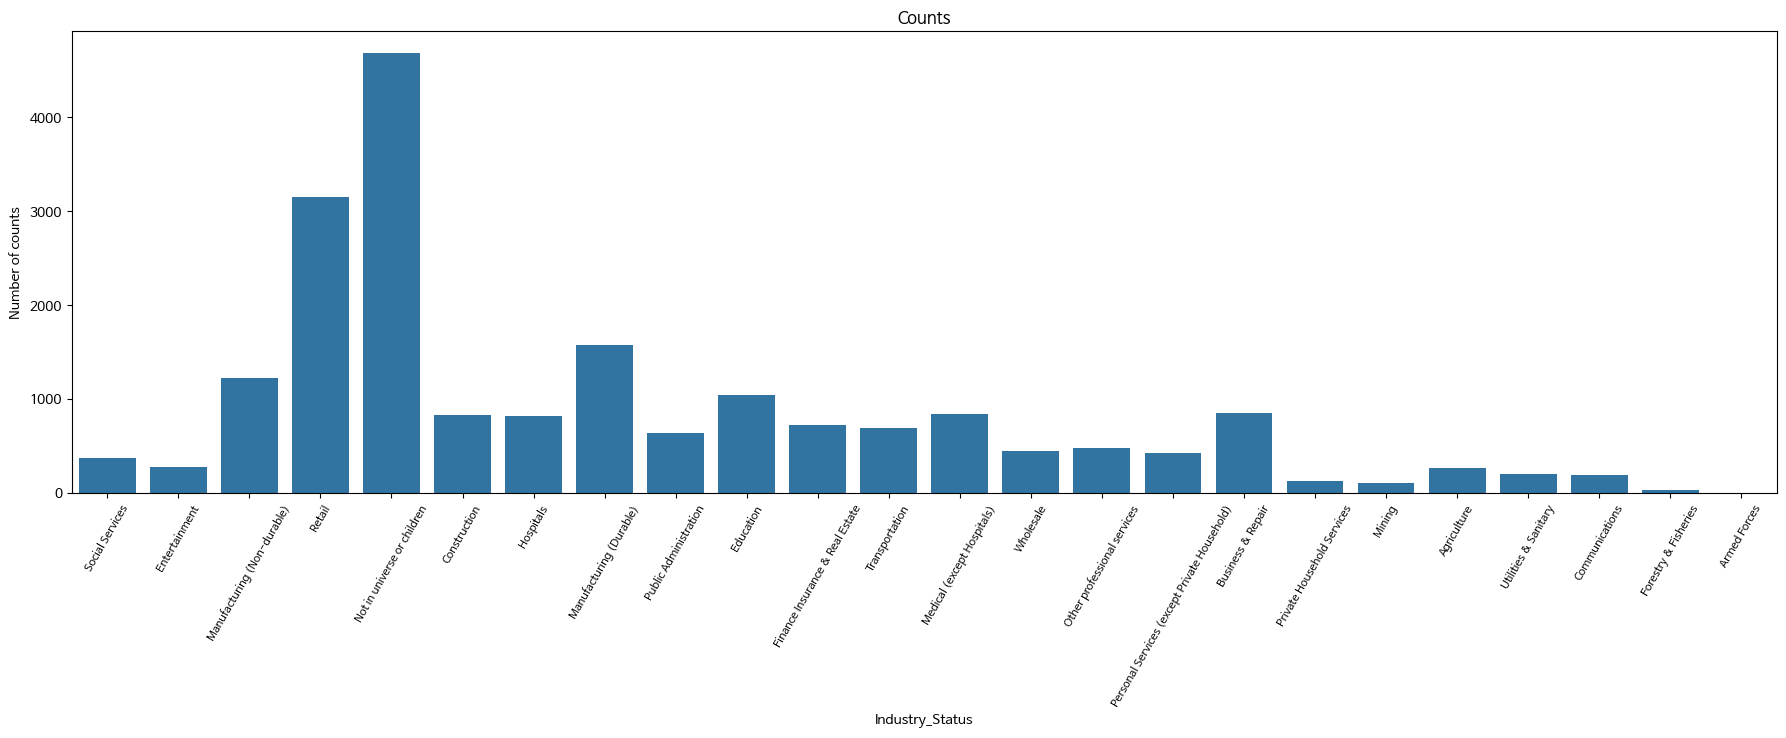

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Industry_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Industry_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

- Employment_Status의 경우에는 Children or army의 비중이 굉장히 높은 수치를 보여줍니다.
- Industry_Status의 Not in universe or children의 비중이 굉장히 높은 대신 Armed Forces의 비율이 굉장히 적은 것을 확인할 수 있습니다. 이는 실제로 Armed Forces의 비중이 굉장히 낮은 것으로 확인되는 것입니다.

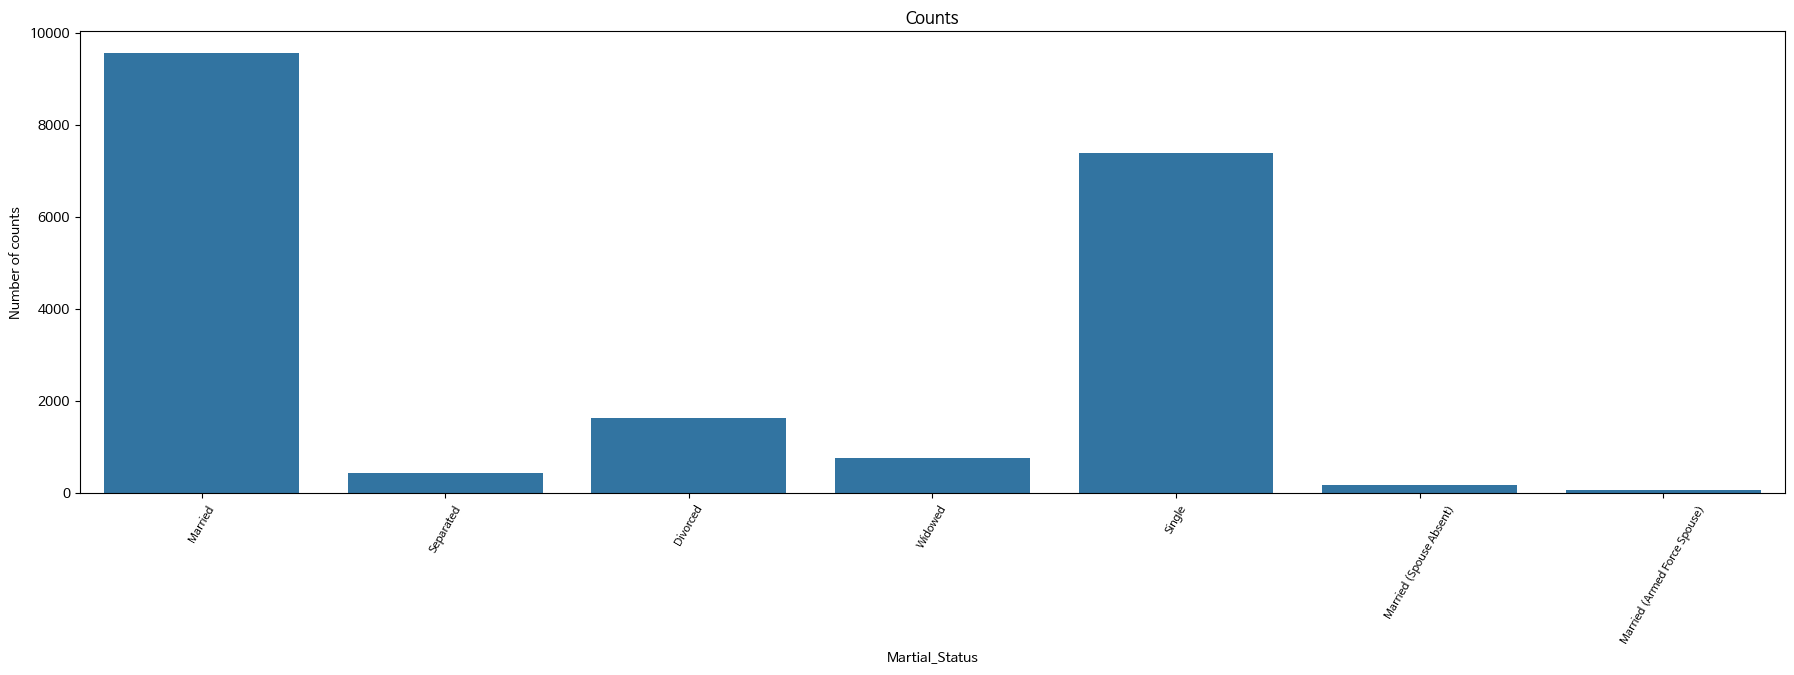

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Martial_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Martial_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

- ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

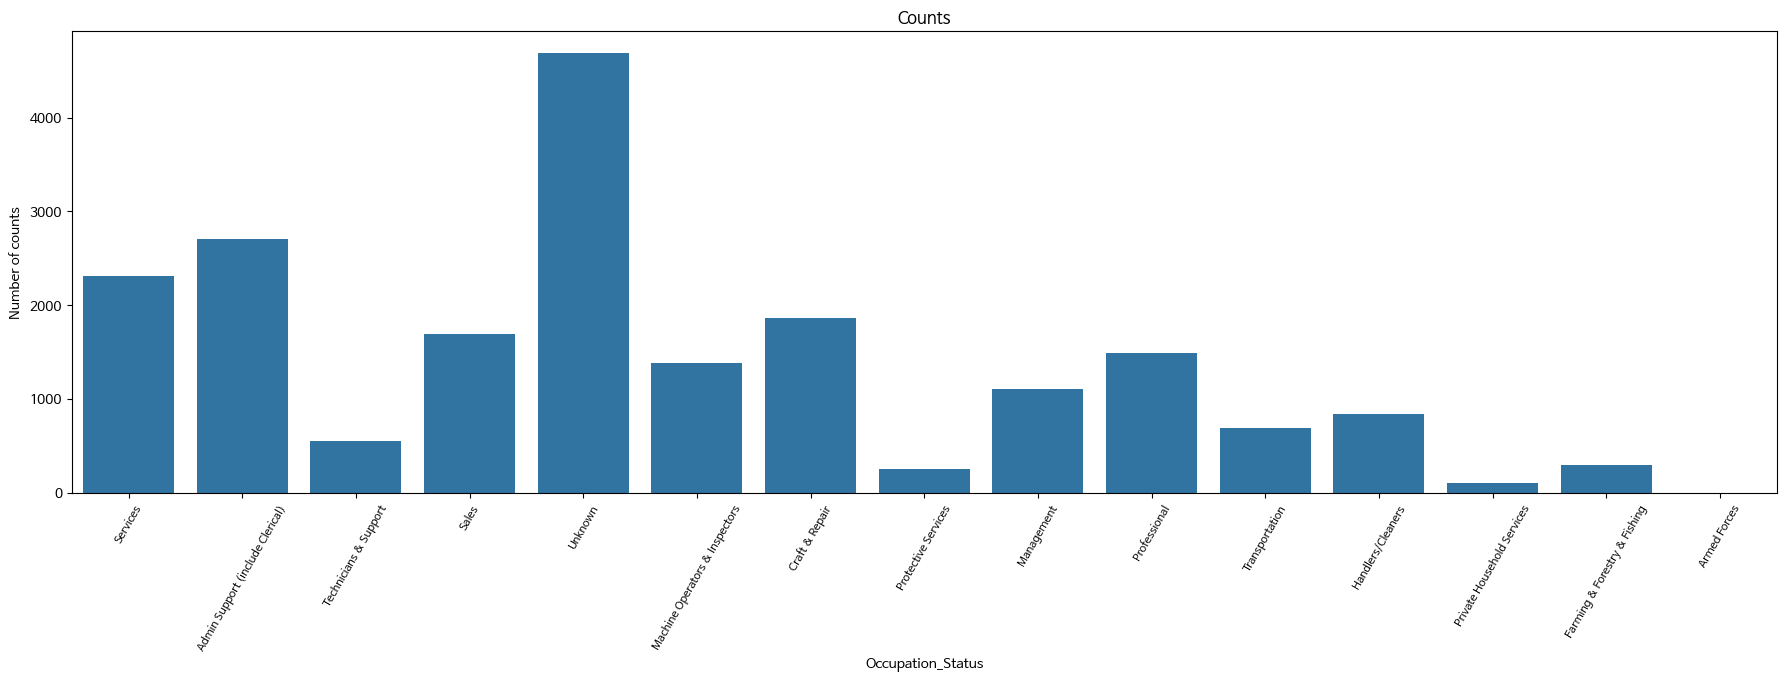

In [11]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Occupation_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Occupation_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

In [12]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

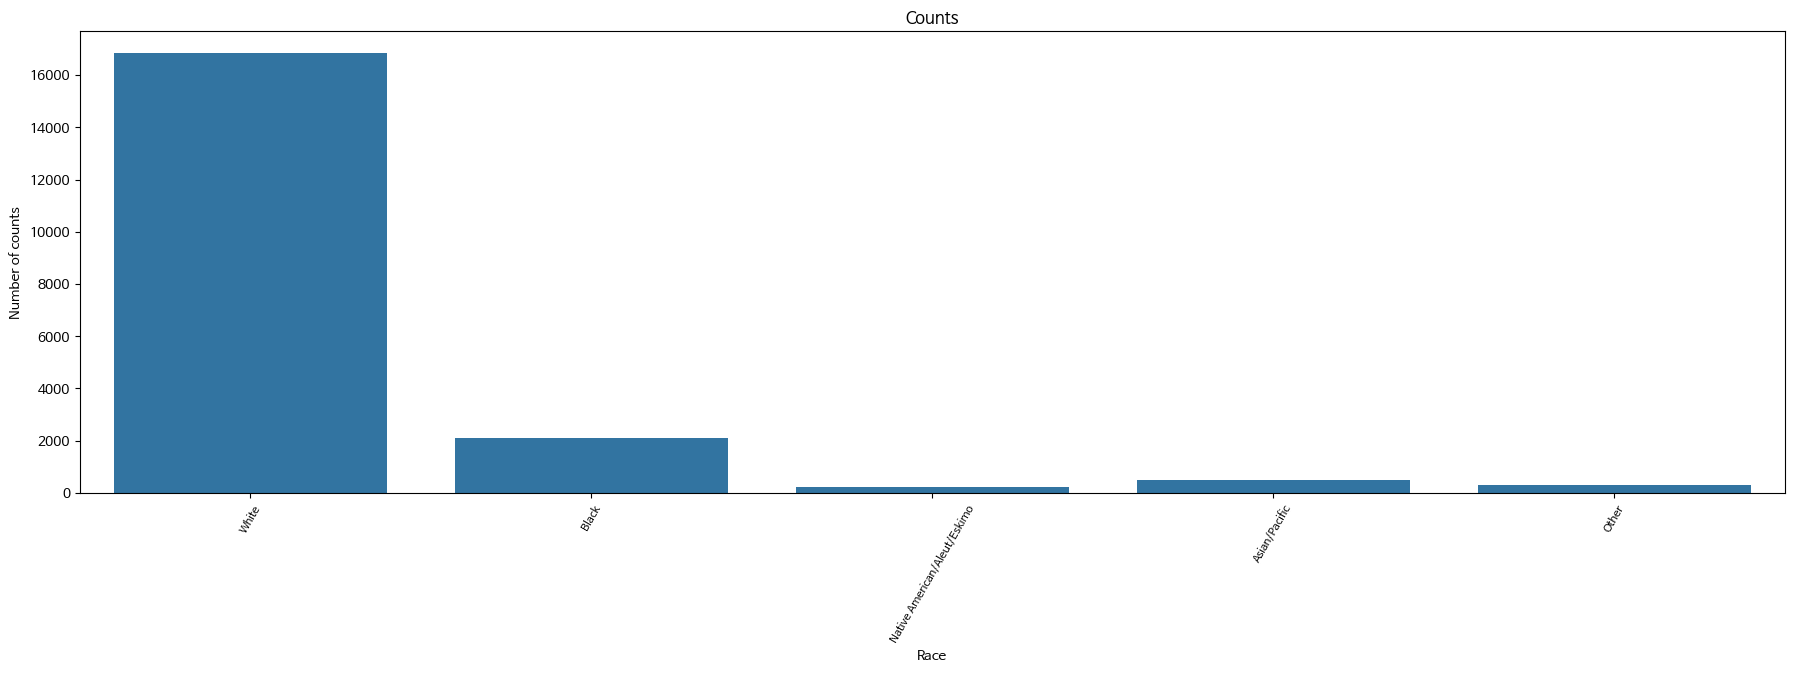

In [13]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Race')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Race')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

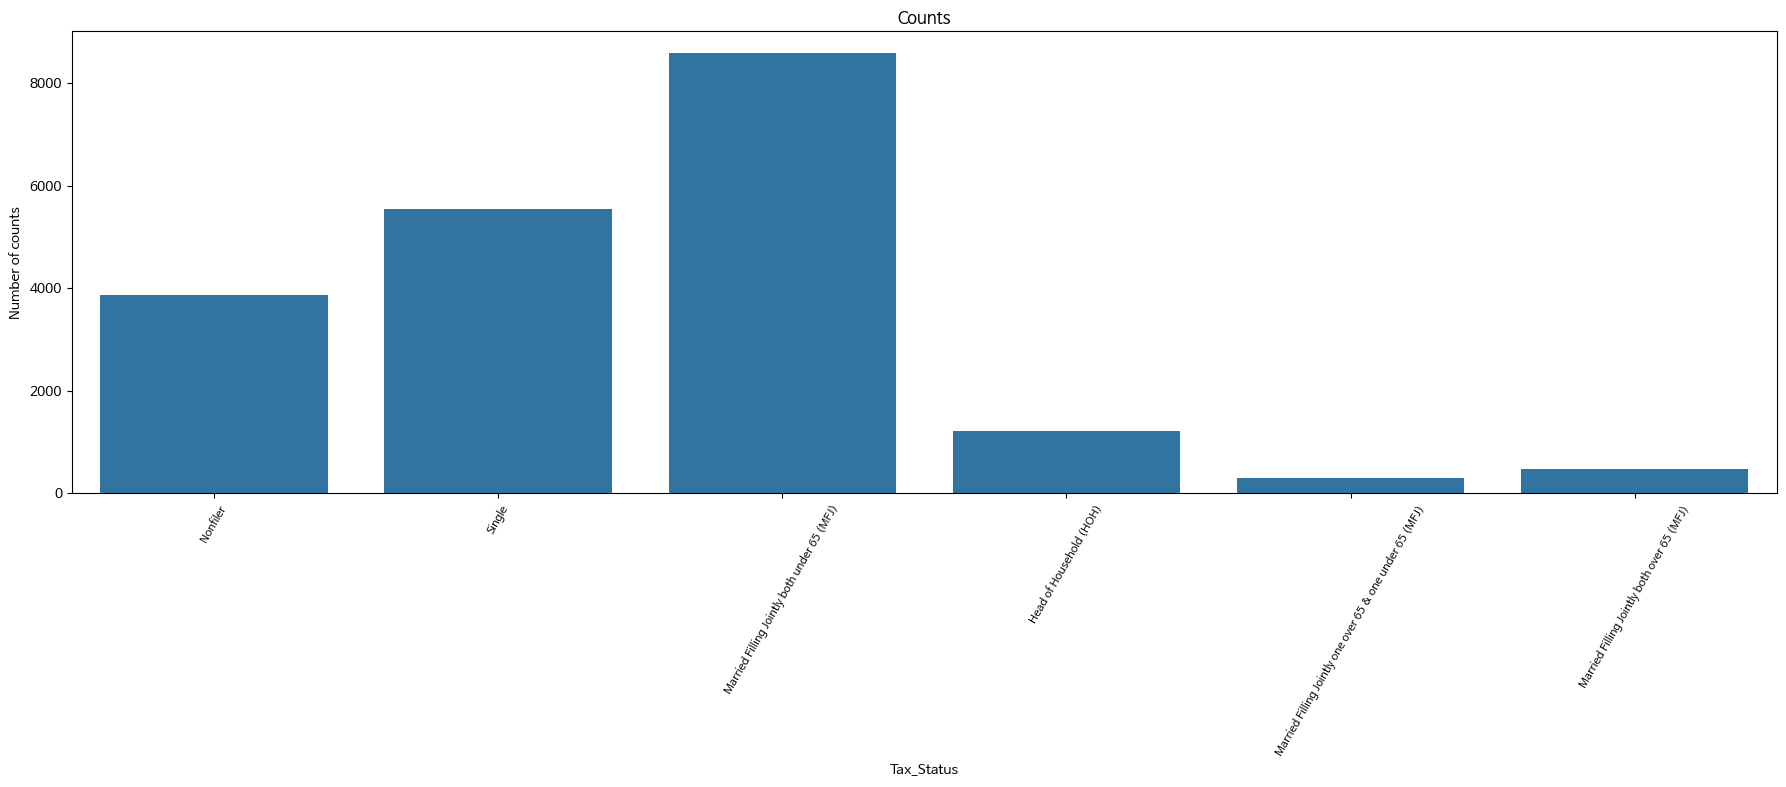

In [14]:
fig, axes = plt.subplots(figsize=(22, 6))

sns.countplot(data=train, x='Tax_Status')
plt.xticks(rotation=60,fontsize=8)

plt.xlabel('Tax_Status')
plt.ylabel('Number of counts')
plt.title('Counts')

plt.show()

- Income과 범주형 데이터의 상관관계에 대해서 분석 진행

In [17]:
train_str.drop(columns = ['ID'],inplace = True)

train_str.shape

(20000, 16)

In [18]:
category_col = ['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status']

In [19]:
# Income과의 상관관계에 대해서 분석

for col in category_col:
  b,c = np.unique(train_str[col],return_inverse = True)
  train_str[col] = c

train_str.head()

,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Citizenship,Education_Status,Employment_Status,Gender,Hispanic_Origin,Household_Status,Household_Summary,Income_Status,Industry_Status,Martial_Status,Occupation_Status,Race,Tax_Status
0,39,39,39,2,15,2,1,0,16,4,2,20,1,11,4,4
1,39,39,39,2,1,2,1,0,18,4,1,6,4,11,4,5
2,39,39,39,2,12,2,0,0,16,4,1,11,1,0,1,2
3,39,39,39,2,12,2,1,0,18,4,1,19,0,12,4,5
4,39,39,39,2,12,2,0,0,16,4,2,19,0,10,4,0


In [21]:
# Income과 범주형 데이터의 상관관계를 구하기 위해서 Income columns을 추가시켜주는 것이다.

train_str['Income'] = train['Income'].copy()

train_str.shape

(20000, 17)

In [22]:
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr

In [23]:
col_names = train_str.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    if c != "income":
        corr = spearmanr(train_str['Income'],train_str[c])[0]

        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
Income,1.000000,1.000000
Occupation_Status,-0.484409,0.484409
Martial_Status,-0.248587,0.248587
Household_Status,0.159155,0.159155
Household_Summary,0.155662,0.155662
Tax_Status,-0.123965,0.123965
Industry_Status,-0.103894,0.103894
Hispanic_Origin,-0.099793,0.099793
Gender,0.079795,0.079795


- Income과 상관관계를 보여주는 지표는 Martial_Status, Tax_status, Household_Summary, Industry_Status 등이 존재합니다.

- 이에 대한 pivot table을 만다는 것도 모델의 성능을 높히는데 도움을 주지 않을까 하는 조심스러운 예측

In [26]:
col_names = train_int.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    if c != "income":
        corr = spearmanr(train_int['Income'],train_int[c])[0]

        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
Income,1.000000,1.000000
Working_Week (Yearly),0.500011,0.500011
Age,0.176675,0.176675
Dividends,0.061522,0.061522
Gains,0.048797,0.048797
Losses,0.033526,0.033526


In [25]:
train['Occupation_Status'].value_counts()

Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: Occupation_Status, dtype: int64